### Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('.\data\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### EDA

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Gender', ylabel='count'>

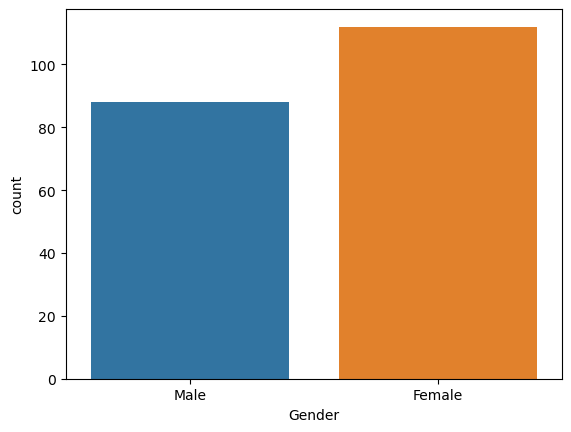

In [7]:
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Age', ylabel='Count'>

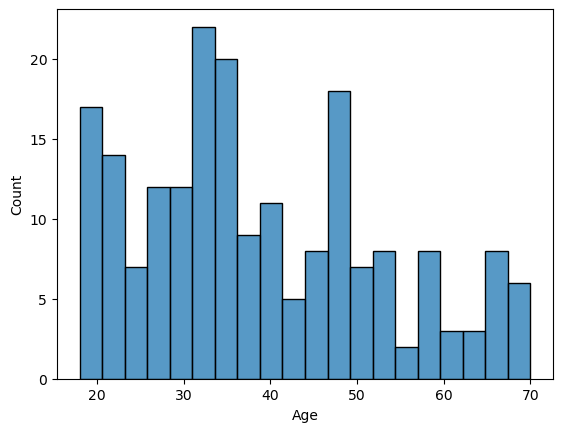

In [8]:
sns.histplot(x='Age', data=df, bins=20)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

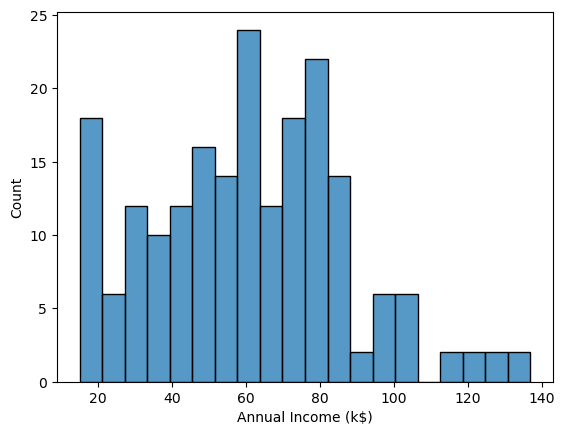

In [9]:
sns.histplot(x='Annual Income (k$)', data=df, bins=20)

<Axes: xlabel='Annual Income (k$)'>

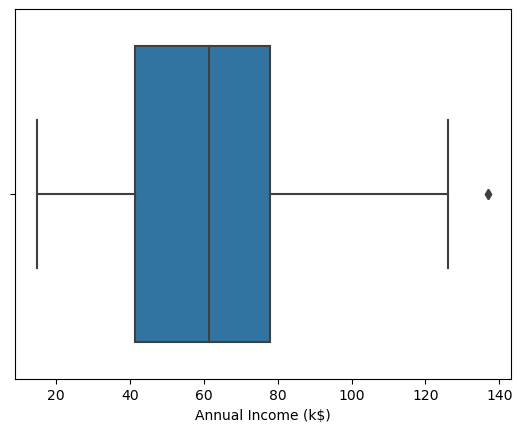

In [10]:
sns.boxplot(x='Annual Income (k$)', data=df)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

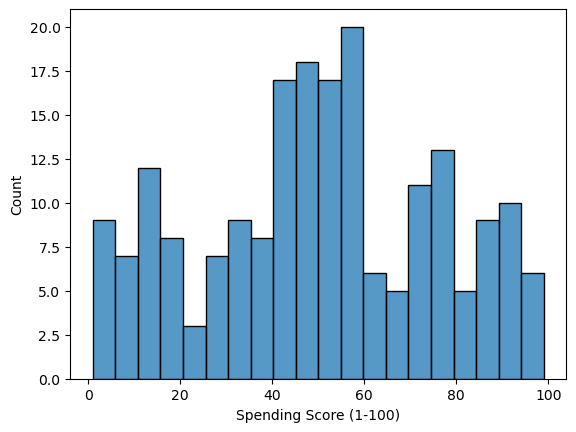

In [11]:
sns.histplot(x=df['Spending Score (1-100)'], bins=20)

<Axes: xlabel='Spending Score (1-100)'>

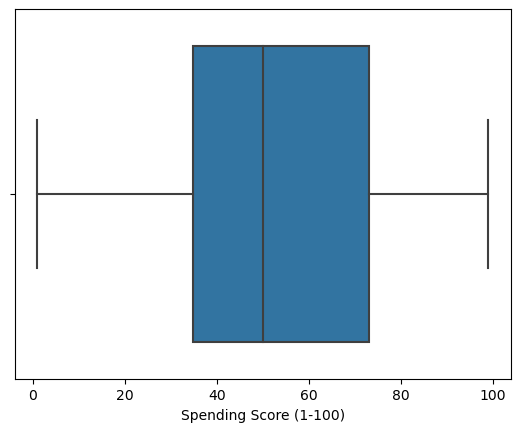

In [12]:
sns.boxplot(x=df['Spending Score (1-100)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Age'>

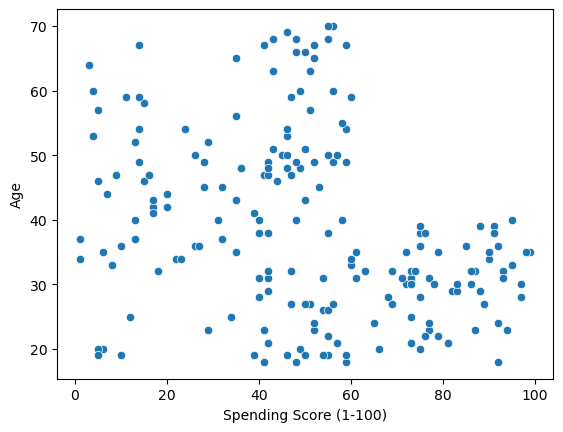

In [13]:
sns.scatterplot(x=df['Spending Score (1-100)'], y=df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

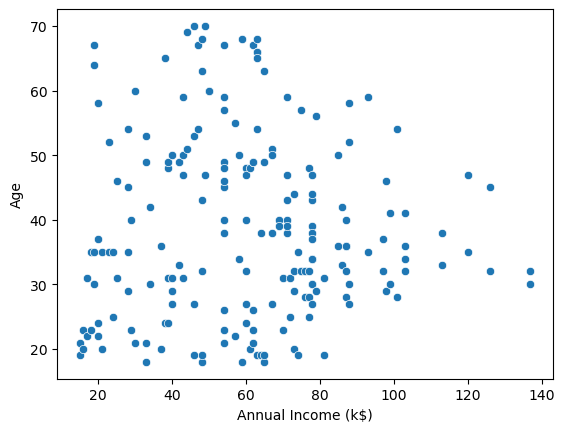

In [14]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Age'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

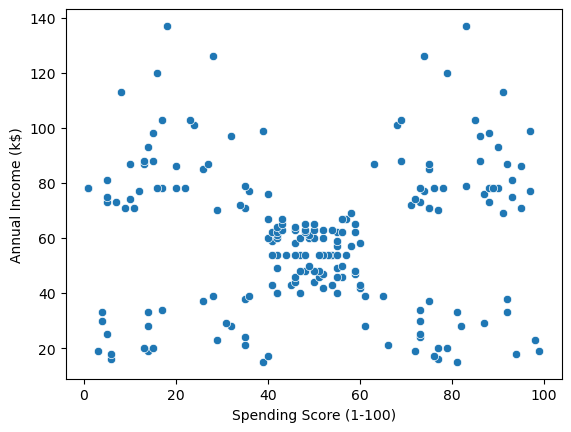

In [15]:
sns.scatterplot(x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'])

### Data Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<Axes: >

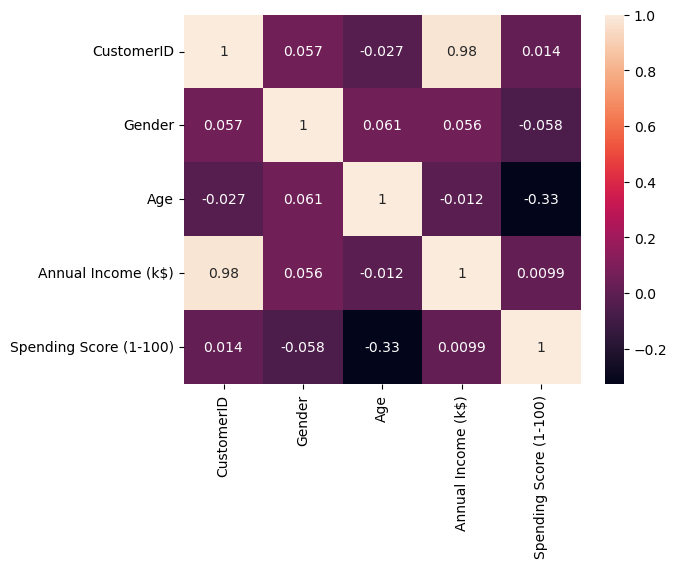

In [18]:
sns.heatmap(df.corr(), annot=True)

In [19]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

<Axes: xlabel='Annual Income (k$)'>

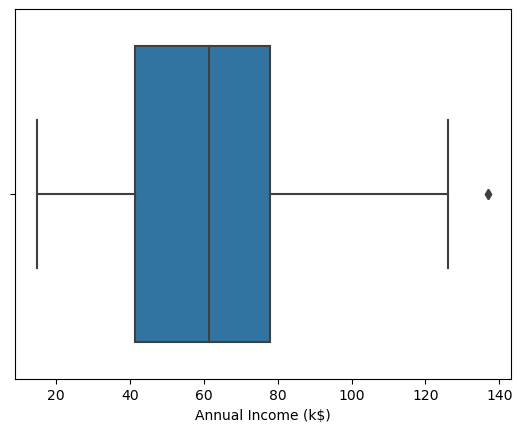

In [21]:
sns.boxplot(x=df['Annual Income (k$)'])

In [22]:
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75) 

IQR = q3-q1
upper_limit = q3+1.5*IQR
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper_limit,30,df['Annual Income (k$)'])

<Axes: xlabel='Annual Income (k$)'>

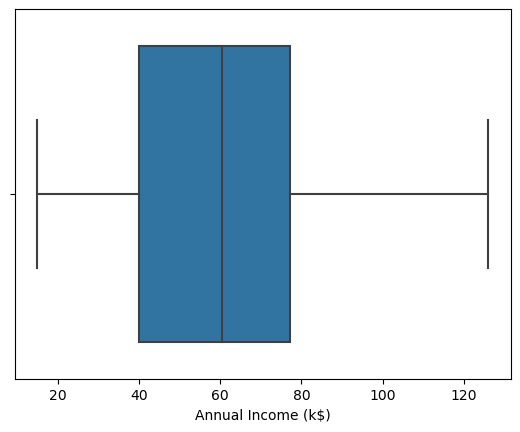

In [23]:
sns.boxplot(x=df['Annual Income (k$)'])

In [24]:
df.drop('CustomerID', axis=1, inplace=True)

In [25]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


### Building ML Model

In [27]:
from sklearn.cluster import KMeans

In [28]:
error=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans.fit(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
    error.append(kmeans.inertia_)

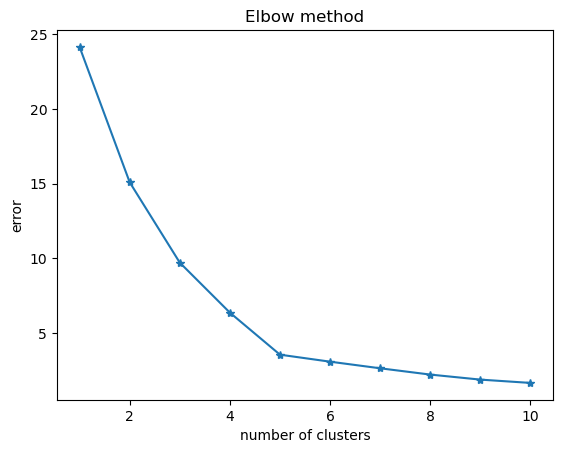

In [29]:
plt.plot(range(1,11),error, marker='*')
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [30]:
num_clusters=5

In [31]:
km_model = KMeans(n_clusters=num_clusters, init = 'k-means++', random_state=42)
km_model.fit(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=42)

In [32]:
pred = km_model.predict(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])

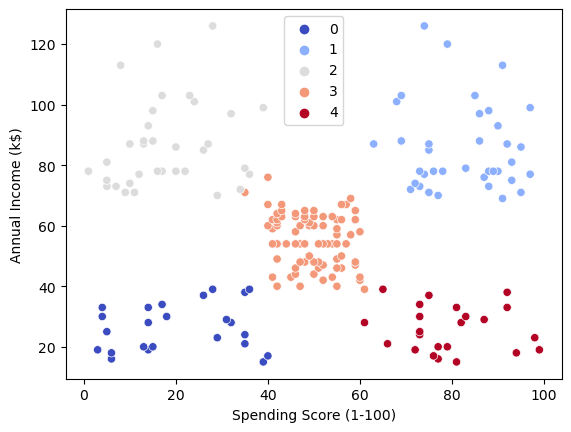

In [33]:
sns.scatterplot(x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue=pred, palette='coolwarm' ,legend='full')
plt.show()